In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
%matplotlib inline 

import torch
import torch.nn.functional as F

In [ ]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x[:, np.newaxis]
y = y[:, np.newaxis]

inp  = np.c_[x,y]

In [ ]:
plt.scatter(x, y)

In [4]:
# defining network
X = torch.from_numpy(inp).type(torch.float32)
# Xnorm = X - X.mean(dim=0)
W = torch.empty(2,1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
b_ = torch.zeros(2, requires_grad=True)

torch.nn.init.uniform_(W)
alpha = 0.01
optimizer = torch.optim.SGD(params=[W, b, b_], lr=alpha)

In [5]:
def encode(x):
    h = x.mm(W) + b
    h = torch.relu(h)
    return h

def decode(h):
    W_ = W.t()
    h_ = h.mm(W_) + b_
    return h_

def forward(x):
    h = encode(x)
    h_ = decode(h)
    return h_

In [6]:
%matplotlib tk
fig = plt.figure()
fig.show()

for i in range(10000):
    X_ = forward(X)
    optimizer.zero_grad()
    loss = F.mse_loss(X_, X)
    loss.backward()
    optimizer.step()
    
    if i%1000 == 0:
        print('loss = ',loss)
        fig.clear()
        xx = forward(X)
        plt.scatter(x,y)
        plt.plot(xx.data.numpy()[:,0],xx.data.numpy()[:,1] )
        plt.show()
        fig.canvas.draw()

%matplotlib inline

loss =  tensor(0.0926, grad_fn=<MseLossBackward>)
loss =  tensor(0.0332, grad_fn=<MseLossBackward>)
loss =  tensor(0.0259, grad_fn=<MseLossBackward>)
loss =  tensor(0.0229, grad_fn=<MseLossBackward>)
loss =  tensor(0.0211, grad_fn=<MseLossBackward>)
loss =  tensor(0.0200, grad_fn=<MseLossBackward>)
loss =  tensor(0.0191, grad_fn=<MseLossBackward>)
loss =  tensor(0.0185, grad_fn=<MseLossBackward>)
loss =  tensor(0.0180, grad_fn=<MseLossBackward>)
loss =  tensor(0.0177, grad_fn=<MseLossBackward>)


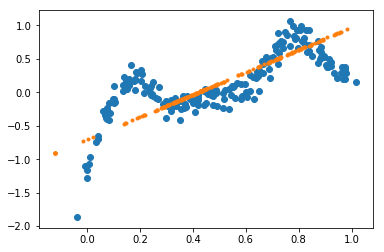

In [7]:
xx = forward(X)
plt.scatter(x,y)
plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='.')

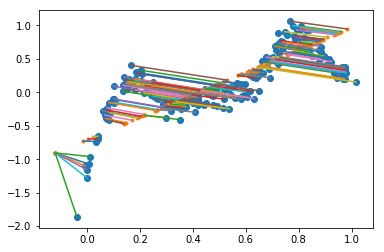

tensor([-0.1199, -0.9067], requires_grad=True)


In [8]:
# plt.axis('equal')
plt.scatter(x, y)
plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='.')
for xxo, yyo, xxPred, yyPred in zip(x, y, xx.data.numpy()[:,0],xx.data.numpy()[:,1]):
    plt.plot([xxo,xxPred], [yyo, yyPred])
plt.show()
print(b_) # the relu creates zero below some value, to accomodate error, the decoding bias achieves value as below:

In [9]:
print(b)

tensor([0.8228], requires_grad=True)


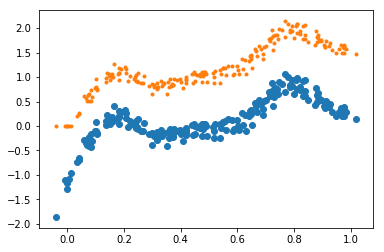

In [10]:
h = encode(X)
plt.scatter(x,y)
plt.scatter(x,h.data.numpy() , lw=1, marker='.')